<h1>CS4619: Artificial Intelligence 2</h1>
<h2>Underfitting and Overfitting</h2>
<h3>
    Derek Bridge<br> 
    School of Computer Science and Information Technology<br> 
    University College Cork
</h3>

# Initialization $\newcommand{\Set}[1]{\{#1\}}$ $\newcommand{\Tuple}[1]{\langle#1\rangle}$ $\newcommand{\v}[1]{\pmb{#1}}$ $\newcommand{\cv}[1]{\begin{bmatrix}#1\end{bmatrix}}$ $\newcommand{\rv}[1]{[#1]}$

In [55]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

<h1>Underfitting and Overfitting</h1>
<p>
    Your estimator is underperforming. What should you do? The options include:
</p>
<ul>
    <li>Add more training data</li>
    <li>Add more features</li>
    <li>Change the complexity of the model</li>
    <li>Change the class of model, e.g., to a more complex one</li>
</ul>
<p>
    Surprisingly, adding more data may not help; and, surprisingly, moving to a more complex model may in some
    cases worsen the results. This lecture shows you how to diagnose the problem and choose remedies that suit 
    the diagnosis.
</p>

<h2>Defining Underfitting and Overfitting</h2>
<p>
    To illustrate the concepts, we will use an artificial dataset. So that we can plot things in 2D, the dataset
    will have just one feature: a numeric-valued feature whose values range from 0 to 1. The dependent variable
    will be a non-linear function of the feature, and we'll add a bit of noise.
</p>

In [58]:
def make_dataset(m, func, error):
    X = np.random.random(m)
    y = func(X, error)
    return X.reshape(m, 1), y

def f(x, error = 1.0):
    y = 10 - 1 / (x + 0.1)
    if error > 0:
        y = np.random.normal(y, error)
    return y

<p>
    Let's create a dataset
</p>

In [59]:
X_train, y_train = make_dataset(50, f, 1.0)
X_test = np.linspace(-0.1, 1.1, 500).reshape(500, 1) 

<p>
    And let's plot the training set:
</p>

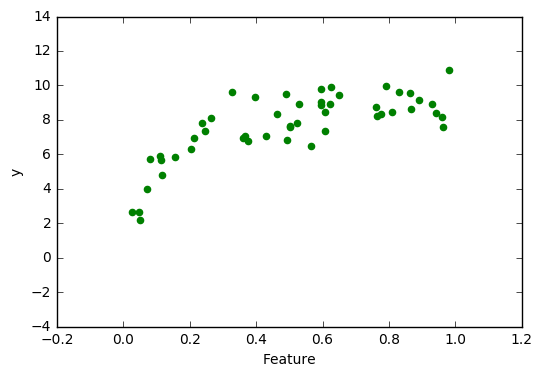

In [60]:
fig = plt.figure()
plt.xlabel("Feature")
plt.ylabel("y")
plt.ylim(-4, 14)
plt.scatter(X_train, y_train, color = 'green')
plt.show()

<h3>Fitting a Linear Model to the Data</h3>
<p>
    We'll use OLS Linear Regression to fit a linear model, and we'll plot that model:
</p>

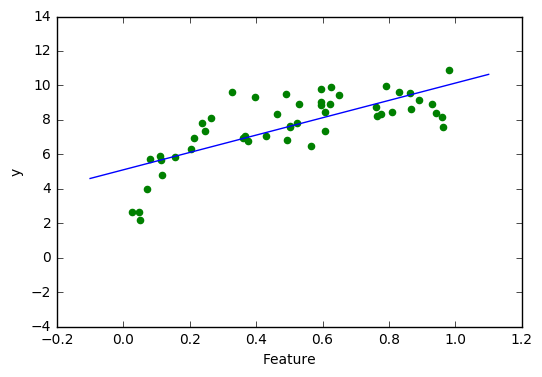

In [61]:
estimator = LinearRegression()

estimator.fit(X_train, y_train)

y_predicted = estimator.predict(X_test)

fig = plt.figure()
plt.xlabel("Feature")
plt.ylabel("y")
plt.ylim(-4, 14)
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_test, y_predicted, color = 'blue')
plt.show()

<p>
    It's easy to see that a linear model is a poor choice. It <b>underfits</b> the data.
</p>

<h3>Fitting a Quadratic Model to the Data</h3>
<p>
    What happens if we try to fit a more complex model such as a quadratic function?
</p>
<p>
    Here's a class for fitting polynomials on a single feature &mdash; the details do not matter.
</p>

In [62]:
class PolynomialRegression(LinearRegression):
    def __init__(self, degree = 1):
        self.degree = degree
        LinearRegression.__init__(self)
        
    def fit(self, X, y):
        return LinearRegression.fit(self, X ** (1 + np.arange(self.degree)), y)
    
    def predict(self, X):
        return LinearRegression.predict(self, X ** (1 + np.arange(self.degree)))

<p>
    So now we can fit a quadratic model:
</p>

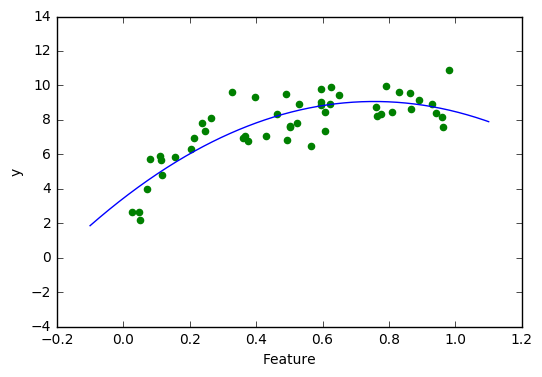

In [63]:
estimator = PolynomialRegression(degree = 2)

estimator.fit(X_train, y_train)

y_predicted = estimator.predict(X_test)

fig = plt.figure()
plt.xlabel("Feature")
plt.ylabel("y")
plt.ylim(-4, 14)
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_test, y_predicted, color = 'blue')
plt.show()

<p>
    This fits the training data much better.
</p>

<h3>Fitting a Much Higher Degree Polynomial to the Data</h3>
<p>
    So what happens if we fit a higher degree polynomial? Here we'll try 30:
</p>

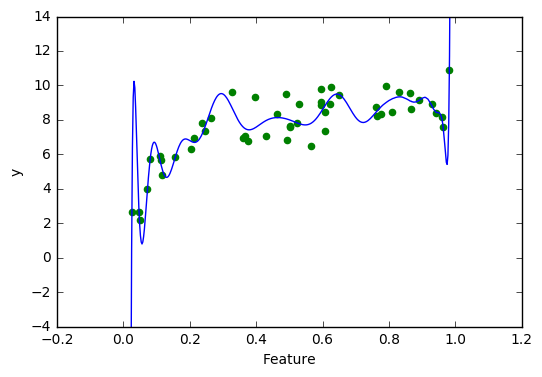

In [64]:
estimator = PolynomialRegression(degree = 30)

estimator.fit(X_train, y_train)

y_predicted = estimator.predict(X_test)

fig = plt.figure()
plt.xlabel("Feature")
plt.ylabel("y")
plt.ylim(-4, 14)
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_test, y_predicted, color = 'blue')
plt.show()

<p>
    While a model of this complexity fits the training set really well, it seems clear that this model is a
    poor choice. It is not capturing the target function; it is fitting to the noise in the training set. 
    It <b>overfits</b> the data. 
</p>

<h3>Underfitting and Overfitting Summary</h3>
<p>
    In summary,
</p>
<ul>
    <li>
        A hypothesis underfits the training set if there is a more complex hypothesis with lower test error.
    </li>
    <li>
        A hypothesis overfits the training set if there is a less complex hypothesis with lower test error.
    </li>
</ul>

<h1>The Bias-Variance Trade-Off</h1>
<p>
    The test error of a hypothesis is made up of three parts:
</p>
<ul>
    <li>the <b>bias</b></li>
    <li>the <b>variance</b>, and</li>
    <li>the <b>irreducible error</b></li>
</ul>
<p>
    The irreducible error is...well..irreducible. It is caused by noise in the training set.
</p>
<p>
    Bias refers to the error we will obtain when we try to capture a target function by a model that is
    too simple, e.g. trying to capture a non-linear target function using linear regression. It is therefore independent 
    of the training set size. Generally, models of low complexity
    result in high bias. If your learning algorithm learns models that are not complex enough, bias may be high. 
    Adding more training data will not help:
    the models are simply too restrictive to capture the target function. 
</p>
<p>
    Variance measures the stability of the learning algorithm in the face of different training sets, i.e. how much
    the function that gets learned changes when the examples in the training set change. Ideally, the function that
    gets learned will not vary too much between training sets. Generally, models of high complexity result in high
    variance. The models may fit the training data 'too well'; they can even fit to the noise in the training set;
    but they do not generalize well to unseen data.
    Adding more data may help: it can reinforce
    the true 'patterns' in the data and swamp the noise.
<p>
    Ideally, we want a learning method that results in models with low bias and low variance. In general, as we
    increase complexity, bias will decrease and variance will increase. So we have a
    <b>bias-variance trade-off</b>.
</p>

<h2>Visualizing the Bias-Variance Trade-Off</h2>
<p>
    We can explore the trade-off by plotting training error and test error for models
    of different complexity &mdash; in this case, polynomials of different degrees.
    This kind of plot is sometimes called a <b>validation curve</b>.
</p>
<p>
    We'll create a larger dataset than we were using earlier in this lecture.
</p>

In [65]:
X, y = make_dataset(200, f, 1.0)

<p>
    And finally here's the plot of training error and test error against complexity (the degree of the polynomial):
</p>

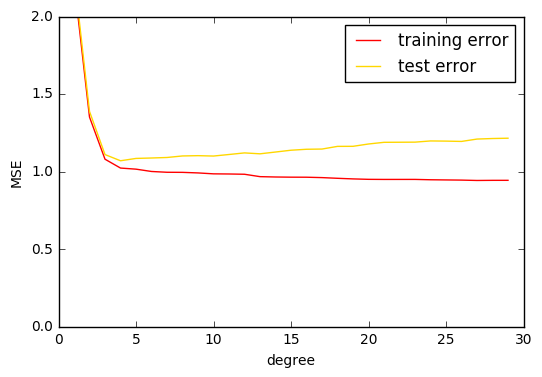

In [66]:
degrees = np.arange(1, 30)

estimator = PolynomialRegression()

mses_train, mses_test = validation_curve(estimator, X, y, 'degree', degrees, cv=10, scoring='neg_mean_squared_error')
mean_mses_train = np.mean(np.abs(mses_train), axis=1)
mean_mses_test = np.mean(np.abs(mses_test), axis=1)

fig = plt.figure()
plt.xlabel("degree")
plt.ylabel("MSE")
plt.ylim(0, 2)
plt.plot(degrees, mean_mses_train, label = 'training error', color = 'red')
plt.plot(degrees, mean_mses_test, label='test error', color = 'gold')
plt.legend()
plt.show()

<p>
    (Note that, because scikit-learn computes the negative of the MSE, I have taken its absolute value
    to give a more intuitive visualisation.)
</p>
<p>
    In a 'typical' graph, the test error will be higher than the training error, as
    you'd expect. 
<p>
    But, additionally, the graph should show the bias-variance trade-off:
</p>
<ul>
    <li>
        Where the complexity is low (low degree polynomials in this case), we have high bias: both the 
        training error and the test error will
        be high, because the hypothesis underfits the data. 
    </li>
    <li>
        Where the complexity is high (high degree polynomials in this case), we have high variance: the 
        training error is low and the test error will be
        high, because the hypothesis overfits the data.
    </li>
</ul>
<p>
    Between the two extremes, there's an optimum complexity where test error is at its lowest.
</p>

<h1>Learning Curves</h1>
<p>
    <b>Learning curves</b> plot training error and test error against the <em>number of examples in the training set</em>.
    When an estimator is underperforming, these curves give some insight into whether the problem is
    high bias or high variance, and hence what to do about it.
</p>

<h2>Learning Curve When Complexity is About Right</h2>
<p>
    We'll plot a learning curve for what we know to be a reasonable level of complexity for this dataset,
    namely polynomials of degree 5:
</p>

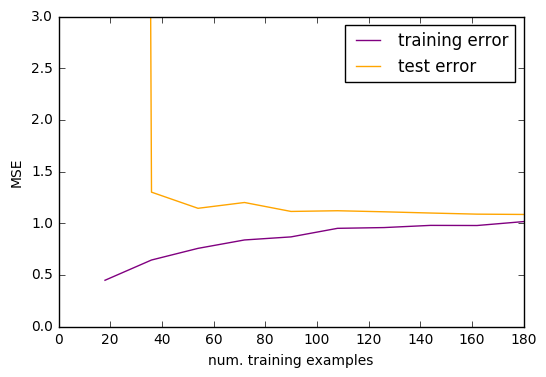

In [67]:
train_set_sizes = np.linspace(.1, 1.0, 10)

estimator = PolynomialRegression(degree=5)

train_sizes, mses_train, mses_test = learning_curve(estimator, X, y, train_sizes=train_set_sizes, cv=10, scoring='neg_mean_squared_error')
mean_mses_train = np.mean(np.abs(mses_train), axis=1)
mean_mses_test = np.mean(np.abs(mses_test), axis=1)

fig = plt.figure()
plt.xlabel("num. training examples")
plt.ylabel("MSE")
plt.ylim(0, 3)
plt.plot(train_sizes, mean_mses_train, label = 'training error', color = 'purple')
plt.plot(train_sizes, mean_mses_test, label='test error', color = 'orange')
plt.legend()
plt.show()

<p>
    When the complexity of the model is about right, the 'typical' learning curve will show a large gap at the
    start: training error is very low (there are few examples, so they're easy to fit) but test error is
    high. As the number of training examples grows, the gap narrows and should converge. If the model 
    complexity is appropriate then, after enough examples have been seen, we should converge on the irreducible
    error in the dataset. In our case this is approximtely 1, because that's how much error we added to the artificial
    dataset.
</p>

<h2>Learning Curve When Complexity is Too Low</h2>
<p>
    Let's look at the learning curve when the model is not complex enough. Here, the polynomials are of
    degree 1:
</p>

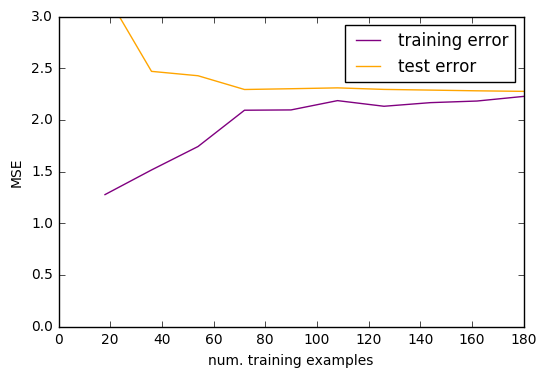

In [68]:
estimator = PolynomialRegression(degree=1)

train_sizes, mses_train, mses_test = learning_curve(estimator, X, y, train_sizes=train_set_sizes, cv=10, scoring='neg_mean_squared_error')
mean_mses_train = np.mean(np.abs(mses_train), axis=1)
mean_mses_test = np.mean(np.abs(mses_test), axis=1)

fig = plt.figure()
plt.xlabel("num. training examples")
plt.ylabel("MSE")
plt.ylim(0, 3)
plt.plot(train_sizes, mean_mses_train, label = 'training error', color = 'purple')
plt.plot(train_sizes, mean_mses_test, label='test error', color = 'orange')
plt.legend()
plt.show()

<p>
    We see that error is higher than the irreducible error. 
</p>
<p>
    Also in a 'typical' learning curve for this situation, the training error and test error will probably not converge.
    Adding more examples doesn't help much. This is because 
    we have high bias: no amount of examples will
    compensate for the fact that the set of hypotheses is just too restrictive.
</p>

<h2>Learning Curve When Complexity is Too High</h2>
<p>
    Let's look at a curve where the model is too complex. Here, the polynomials are of degree 16:
</p>

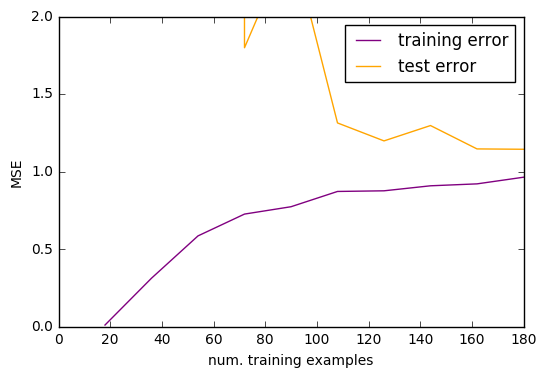

In [69]:
estimator = PolynomialRegression(degree=16)

train_sizes, mses_train, mses_test = learning_curve(estimator, X, y, train_sizes=train_set_sizes, cv=10, scoring='neg_mean_squared_error')
mean_mses_train = np.mean(np.abs(mses_train), axis=1)
mean_mses_test = np.mean(np.abs(mses_test), axis=1)

fig = plt.figure()
plt.xlabel("num. training examples")
plt.ylabel("MSE")
plt.ylim(0, 2)
plt.plot(train_sizes, mean_mses_train, label = 'training error', color = 'purple')
plt.plot(train_sizes, mean_mses_test, label='test error', color = 'orange')
plt.legend()
plt.show()

<p>
    Here we have high variance: adding more examples is helping. But it's not converging as quickly as it did
    for degree 5. This is because the set of hypotheses is larger, so we need more examples to discriminate
    between the them.
</p>

<h2>Remedial Actions</h2>
<p>
    If the curves aren't converging:
</p>
<ul>
    <li>
        Increase the complexity &mdash; if you think you're underfitting due to high bias
        <ul>
            <li>
                Move to a more complex model (e.g. a polynomial of a higher degree, or a different kind of 
                model, such as a nonparametric one that makes fewer assumptions about the target function)
            </li>
            <li>
                Move to a more complex variant of your current model
            </li>
        </ul>
    </li>
    <li>
        Add more features &mdash; ones that are predictive of the dependent variable
    </li>
</ul>
<p>
    If the curves are converging but too slowly:
</p>
<ul>
    <li>
        Decrease the complexity &mdash; if you think you're overfitting due to high variance
        <ul>
            <li>
                Move to a less complex model (e.g. a polynomial of a lower degree or a different kind of
                model that makes more assumptions about the target function)
            </li>
            <li>
                Move to a less complex variant of your current model (e.g. regularization, smoothing, ...)
            </li>
        </ul>
    </li>
    <li>
        Add more examples
    </li>
</ul>
<p>
    This isn't an exhaustive set of remedial actions. For example, if the curves aren't converging, maybe you
    have lots of irrelevant features: removing some might help the learner fit a good hypothesis. And if the
    curves are converging too slowly, then  maybe using a method to detect and remove noisy examples will
    help.
</p>
<p>
    Credits. I based this notebook on some resources from Jake VanderPLas, including <a href="http://www.astroml.org/sklearn_tutorial/practical.html">http://www.astroml.org/sklearn_tutorial/practical.html</a>
</p>